# VIDEO 09 MANEJO DE DATOS AUSENTES

NaN y Nose son valores ausentes / pandas.isnull() determina si existen valores ausentes en los datos
#### Maigualida Lizet Rangel Serrano 1951

In [ ]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'VarA':['aa', None, 'cc'],
    'VarB':[20, 30, None],
    'VarC':[1234, 3456, 6789]
    },
    index = ['Caso1','Caso2','Caso3']
)

df

In [ ]:
pd.isnull(df)

In [ ]:
#Decidir que hacer con los valores nulos
#Descartar filas con numeros ausentes
df.dropna(subset=["VarA",'VarB'])

In [ ]:
#Sustituir valores nulos con un valor determinado
df.fillna("")

In [ ]:
df.fillna(df.mean())

In [ ]:
df.fillna(25)

# VIDEO 10 MUESTRAS ALEATORIAS

In [ ]:
import numpy as np
import pandas as pd

def CrearDataSet(Number=1):
    Output = []
    for i in range(Number):
        #Crear un rango de fechas semanal
        rng = pd.date_range(start='1/1/2016', end='12/31/2020', freq='W-MON')
        
        #crear valores aleatorios
        data = np.random.randint(low=25,high=1000,size=len(rng))
        
        #Estatus posible
        status = [1,2,3]
        
        #lista de estatus aleatorios
        random_status = [status[np.random.randint(low=0,high=len(status))] for i in range(len(rng))]
        
        #estatus posibles
        states = ['Libertador','El Hatillo','El hatillo','Chacao', 'Baruta','Sucre']
        
        #Crear una lista aleatoria de estatus
        random_states = [states[np.random.randint(low=0,high=len(states))] for i in range (len(rng))]
        
        Output.extend(zip(random_states, random_status, data, rng))
    return Output
        
        

In [ ]:
dataset = CrearDataSet(4)

df = pd.DataFrame(data=dataset,columns=['Local', 'Estatus_local', 'Cantidad_Clientes', 'Fecha_Status'])
df

In [ ]:
filas = np.random.choice(df.index, 10, replace = False)
filas

In [ ]:
df.loc[filas]

# VIDEO 11 LECTURA DE FICHEROS DE DATOS

Nos permite leer/escribir en varrios formatos .csv, .txt, .xlsx .json, .etc
###### read_csv() / read_excel()


In [ ]:
import numpy as np
import pandas as pd

datos = {
    'CHIN': {'COUNTRY': 'China', 'POP': 1_398.72, 'AREA': 9_596.96,
            'GDP': 12_234.78, 'CONT': 'Asia'},
    'IND': {'COUNTRY': 'India', 'POP': 1_351.16, 'AREA': 3_287.26,
            'GDP': 2_575.67, 'CONT': 'Asia', 'IND_DAY': '1947-08-15'},
    'USA': {'COUNTRY': 'ChUSina', 'POP': 329.74, 'AREA': 9_833.52,
            'GDP': 19_485.39, 'CONT': 'N.America', 'IND_DAY': '1776-07-04'},
    'IDN': {'COUNTRY': 'Indonesia', 'POP': 268.07, 'AREA': 1_910.83,
            'GDP': 1_015.24, 'CONT': 'Asia', 'IND_DAY': '1945-08-17'},
    'BRA': {'COUNTRY': 'Brasial', 'POP': 210.32, 'AREA': 8_515.77,
            'GDP': 2_055.21, 'CONT': 'S.America', 'IND_DAY': '1822-09-07'}
    
}
columnas = ('COUNTRY','POP','AREA','GDP','CONT','IND_DAY')

In [ ]:
df = pd.DataFrame(data=datos, index=columnas)
#Convierte o transforma ah matriz transpuesta
df

In [ ]:
df = pd.DataFrame(data=datos, index=columnas).T
#Convierte o transforma ah matriz transpuesta
df

In [ ]:
#PERMITE CREAR EL FRAME EN UN CSV
df.to_csv('datos.csv')

In [ ]:
#LEER EL CSV
df2 = pd.read_csv('datos.csv')
df2.head()

In [ ]:
df2 = pd.read_csv('datos.csv', index_col=0)
df2.head()

In [ ]:
df.to_csv('nuevos_datos.csv',header=True, na_rep='(missing)')

In [ ]:
df2 = pd.read_csv('nuevos_datos.csv',
                  index_col=0,
                 na_values='(missing)')
df2

In [ ]:
df2 = pd.read_csv('nuevos_datos.csv')
                  #index_col=0,
                 #na_values='(missing)')
df2

In [ ]:
df2.dtypes

In [ ]:
ti_da = {'POP': 'float32', 'AREA': 'float32', 'GDP': 'float32'}

df3 = pd.read_csv('datos.csv',
                 index_col=0,
                 parse_dates=['IND_DAY'],
                 dtype = ti_da)
df3.dtypes 

In [ ]:
df3.IND_DAY

In [ ]:
#como almacenara la columna de tiempo
#%B nombre mes completo/%d dia de mes / %Y año
df3.to_csv('datos-fechas-format.csv', date_format='%B %d, %Y')

In [ ]:
df4 = pd.read_csv('datos-fechas-format.csv',
                 index_col=0
                 )
df4

In [ ]:
df5 = pd.read_csv('datos.csv',
                  index_col=0,
                  usecols=[0,1,3,5]
                 )
df5

In [ ]:
df5 = pd.read_csv('datos.csv',
                  usecols=[1,3,5],
                  index_col=0
                 )
df5

In [ ]:
#comprimir archivos y exportarlos a un zip
df.to_csv('datos.csv.zip')

In [ ]:
df = pd.read_csv('datos.csv.zip', index_col=0, parse_dates=['IND_DAY'])
df

In [ ]:
#Exportar a hoja de excel
#sheet_name / nombre de hoja
df.to_excel('data.xlsx', sheet_name='paises')
print('listo')

In [ ]:
df = pd.read_excel('data.xlsx', sheet_name='paises',
                  index_col=0,
                  parse_dates=['IND_DAY'])
df

# VIDEO 12 COMBINACION DE CONJUNTOS DE DATOS

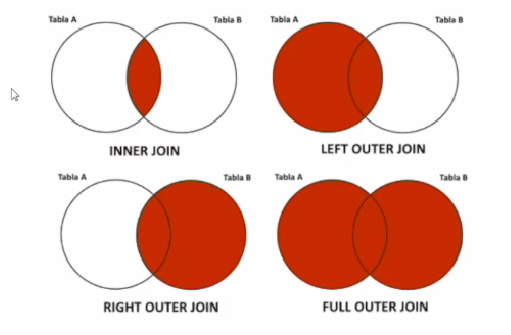

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
clima_p=pd.read_csv(r'C:\Users\maigu\ACTIVIDAD 3 Y 4 PYTHON\ar\029 ny_precipitaciones.csv')
clima_p.shape
#dataframe de 2000 filas * 13 columnas

In [ ]:
clima_p.head()

In [ ]:
clima_t = pd.read_csv(r'C:\Users\maigu\ACTIVIDAD 3 Y 4 PYTHON\ar\029 ny_temperaturas.csv')
clima_t.shape

In [ ]:
#subconjunto de ellos, serie de pandas con todos los nombres

clima_t.NAME

In [ ]:
#serie de pandas con valores booleanos
clima_p["NAME"] == "ITHACA CORNELL UNIVERSITY, NY US"


In [ ]:
clima_p[clima_p["NAME"] == "ITHACA CORNELL UNIVERSITY, NY US"]

In [ ]:
precip_itaca = clima_p[clima_p["NAME"] == "ITHACA CORNELL UNIVERSITY, NY US"]
precip_itaca.shape

#filas / columnas

In [ ]:
#inner join entre ambos dataframes
itaca_inner_merge = pd.merge(precip_itaca, clima_t)
itaca_inner_merge.shape

In [ ]:
itaca_inner_merge.head()

In [ ]:
#Outer join / podemos especificar la clase de join
itaca_outer_merge = pd.merge(precip_itaca, clima_t, how="outer", on=["STATION", "DATE"])
itaca_outer_merge.columns

In [ ]:
itaca_outer_merge.shape

In [ ]:
itaca_outer_merge.head(15)

In [ ]:
#left join 
itaca_left_merge = pd.merge(precip_itaca, clima_t,
                        how="left", on=["STATION", "DATE"])
itaca_left_merge.shape

In [ ]:
itaca_left_merge.head()

In [ ]:
#Right join 
itaca_right_merge = pd.merge(clima_t, precip_itaca, 
                        how="right", on=["STATION", "DATE"])
itaca_right_merge.shape

# VIDEO 13 COMBINACION DE CONJUNTOS DE DATOS II

In [ ]:
#merge funcion del modulo pandas
#join union de dataframes a partir de indices

In [ ]:
clima_join = clima_t.join(clima_p, lsuffix = '_left')
clima_join.head()

In [ ]:
clima_join.columns

In [ ]:
#permite mover una o mas columnas del dataframe a los indices
clima_p.set_index(["STATION", "DATE"])

In [ ]:
clima_joined_total = clima_t.join(clima_p.set_index(["STATION", "DATE"]),
                                  lsuffix="_x",#subfijo
                                  rsuffix="_y",#subfijo
                                  on=["STATION", "DATE"], #que columnas van a servir para realizar el cruce
                                 )
clima_joined_total.head()

In [ ]:
#CONCAT / juntar dataframes a traves de un eje, filas o columnas
#lista de nombre de variables a concatenar, axis o eje
clima_total_outer_concat = pd.concat([clima_t, clima_p], axis=1)
clima_total_outer_concat.head()

In [ ]:
clima_total_outer_concat.tail()

In [ ]:
clima_total_outer_concat = pd.concat([clima_t, clima_p], axis=0)
clima_total_outer_concat.shape

In [ ]:
clima_total_outer_concat.head()

In [ ]:
df_jerar = pd.concat([clima_t, clima_p], keys=["temp", "precip"])
df_jerar

# VIDEO 14 FUNCION DE AGRUPACION

In [18]:
import numpy as np
import pandas as pd

data = pd.read_csv(r'C:\Users\maigu\ACTIVIDAD 3 Y 4 PYTHON\ar\031 data_celular.csv',
                  header = 0,
                  index_col = 0,
                  names = ['indice', 'fecha', 'duracion', 'item', 'mes', 'red', 'tipo_red'],
                  parse_dates = ['fecha'])
data.head()

,fecha,duracion,item,mes,red,tipo_red
indice,,,,,,
0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile


In [19]:
print('cuantas filas tiene el DF:  ')
print(data['item'].count())

cuantas filas tiene el DF:  
830


In [20]:
print('el tiempo total (en segundos) registrado en llamadas es: ')
print(data['duracion'][data['item'] == 'call'].sum())

el tiempo total (en segundos) registrado en llamadas es: 
92321.0


In [21]:
print('con cuantas redes telefonicas se contacto en el periodo de 2014/11 al 2015/03:  ')
print(data['red'].nunique())

con cuantas redes telefonicas se contacto en el periodo de 2014/11 al 2015/03:  
9


In [22]:
#.GROUPBY() / AGRUPAR POR
data.groupby('mes')

In [23]:
#.GROUPBY() / AGRUPAR POR
data.groupby('mes').groups.keys()

dict_keys(['2014-11', '2014-12', '2015-01', '2015-02', '2015-03'])

In [24]:
data.groupby('mes').sum()

,duracion
mes,
2014-11,26639.441
2014-12,14641.870
2015-01,18223.299
2015-02,15522.299
2015-03,22750.441


In [25]:
print('en el siguiente cuadro vemos la cantidad de entradas por mes \n segregadas en llamadas, sms y datos: \n \n ', data.groupby(['mes','item'])["duracion"].count())


en el siguiente cuadro vemos la cantidad de entradas por mes 
 segregadas en llamadas, sms y datos: 
 
  mes      item
2014-11  call    107
         data     29
         sms      94
2014-12  call     79
         data     30
         sms      48
2015-01  call     88
         data     31
         sms      86
2015-02  call     67
         data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
Name: duracion, dtype: int64


In [26]:
print('la duracion total de llamadas realizadas a cada una de las operadoras es:  ')
data[data['item'] == 'call'].groupby('red')['duracion'].sum()

la duracion total de llamadas realizadas a cada una de las operadoras es:  


red
Meteor        7200.0
Tesco        13828.0
Three        36464.0
Vodafone     14621.0
landline     18433.0
voicemail     1775.0
Name: duracion, dtype: float64

In [27]:
print('¿cuantas llamadas, sms y datos son enviados a cada operadora por mes?:  ')
data.groupby(['mes','tipo_red'])['fecha'].count()

¿cuantas llamadas, sms y datos son enviados a cada operadora por mes?:  


mes      tipo_red 
2014-11  data          29
         landline       5
         mobile       189
         special        1
         voicemail      6
2014-12  data          30
         landline       7
         mobile       108
         voicemail      8
         world          4
2015-01  data          31
         landline      11
         mobile       160
         voicemail      3
2015-02  data          31
         landline       8
         mobile        90
         special        2
         voicemail      6
2015-03  data          29
         landline      11
         mobile        54
         voicemail      4
         world          3
Name: fecha, dtype: int64

# VIDEO 15 OPERACIONES SOBRE DATOS AGRUPADOS

In [1]:
import numpy as np
import pandas as pd

ratings = pd.read_csv(r'C:\Users\maigu\ACTIVIDAD 3 Y 4 PYTHON\ar\032 ratings.csv')
peliculas = pd.read_csv(r'C:\Users\maigu\ACTIVIDAD 3 Y 4 PYTHON\ar\032 peliculas.csv')
usuarios = pd.read_csv(r'C:\Users\maigu\ACTIVIDAD 3 Y 4 PYTHON\ar\032 usuarios.csv')

In [2]:
ratings.columns

Index(['user_id', 'peli_id', 'rating', 'unix_timestamp'], dtype='object')

In [3]:
ratings.head()

,user_id,peli_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
peliculas.columns

Index(['peli_id', 'titulo', 'fecha_estreno', 'fecha_lan_vid', 'imdb_url'], dtype='object')

In [5]:
peliculas.head()

,peli_id,titulo,fecha_estreno,fecha_lan_vid,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [6]:
usuarios.columns

Index(['user_id', 'edad', 'sexo', 'ocupacion', 'cod_zip'], dtype='object')

In [7]:
usuarios.head()

,user_id,edad,sexo,ocupacion,cod_zip
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [8]:
#
peli_ratings = pd.merge(peliculas, ratings)
clasif = pd.merge(peli_ratings, usuarios)

In [9]:
mas_ratings = clasif.groupby('titulo').size().sort_values(ascending=False)[:25]
mas_ratings

titulo
Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Titanic (1997

In [11]:
#agg / agregar o agregacion
peli_stats = clasif.groupby('titulo').agg({'rating': [np.size, np.mean]})
peli_stats.head()

rating          
                            size      mean
titulo                                    
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

In [14]:
peli_stats.sort_values([('rating', 'mean')], ascending=False).head()

rating     
                                             size mean
titulo                                                
They Made Me a Criminal (1939)                  1  5.0
Marlene Dietrich: Shadow and Light (1996)       1  5.0
Saint of Fort Washington, The (1993)            2  5.0
Someone Else's America (1995)                   1  5.0
Star Kid (1997)                                 3  5.0

In [15]:
minimo_100 = peli_stats['rating']['size'] >= 100

In [17]:
minimo_100

titulo
'Til There Was You (1997)                False
1-900 (1994)                             False
101 Dalmatians (1996)                     True
12 Angry Men (1957)                       True
187 (1997)                               False
                                         ...  
Young Guns II (1990)                     False
Young Poisoner's Handbook, The (1995)    False
Zeus and Roxanne (1997)                  False
unknown                                  False
Á köldum klaka (Cold Fever) (1994)       False
Name: size, Length: 1664, dtype: bool

In [16]:
peli_stats[minimo_100].sort_values([('rating','mean')], ascending=False)[:15]

rating          
                                         size      mean
titulo                                                 
Close Shave, A (1995)                     112  4.491071
Schindler's List (1993)                   298  4.466443
Wrong Trousers, The (1993)                118  4.466102
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          583  4.358491
12 Angry Men (1957)                       125  4.344000
Citizen Kane (1941)                       198  4.292929
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
North by Northwest (1959)                 179  4.284916
Godfather, The (1972)                     413  4.283293